# Separation des sources

Application des methodes pour la separation des sources en utilisant la bibliotheques scikit learn.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import NMF
import scipy.io
import math

## NMF

### Example using images

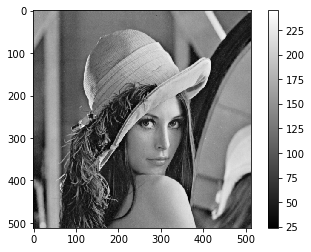

In [4]:
img = plt.imread('lena.bmp')
plt.imshow(img, cmap = 'gray')
plt.colorbar()
plt.show()

In [5]:
model_img = NMF(n_components=2, init='random', random_state=0)
W_img = model_img.fit_transform(img)
H_img = model_img.components_

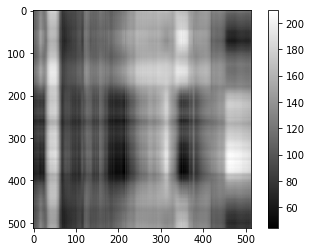

In [6]:
img2 = np.matmul(W_img, H_img)

plt.imshow(img2, cmap = 'gray')
plt.colorbar()
plt.show()

In [7]:
def calculate_psnr(img1, img2, max_value=255):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    mse = np.mean((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32)) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(max_value / (np.sqrt(mse)))

In [8]:
print('PSNR between the images: ' + str(calculate_psnr(img, img2)))

PSNR between the images: 17.11536325766161


### Example using

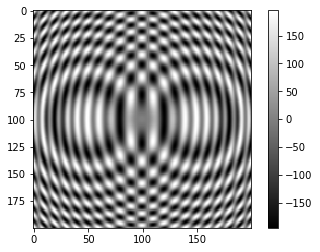

In [33]:
hol = scipy.io.loadmat('hologram_image.mat')
hol = np.loadtxt('hologram_image.mat')

plt.imshow(hol, cmap='gray')
plt.colorbar()
plt.show()

In [10]:
hol_positive = np.zeros((len(hol), len(hol[0])))

for r in range(len(hol)):
    for c in range(len(hol[0])):
        if hol[r][c] < 0:
            hol_positive[r][c] = 0;
        else:
            hol_positive[r][c] = hol[r][c]

model_hol = NMF(n_components=2, init='random', random_state=0)
W_hol = model_hol.fit_transform(hol_positive)
H_hol = model_hol.components_

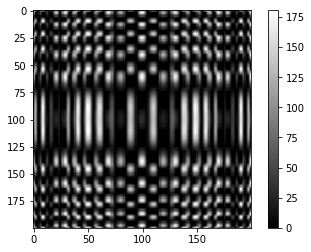

In [11]:
hol2 = np.matmul(W_hol, H_hol)

plt.imshow(hol2, cmap = 'gray')
plt.colorbar()
plt.show()

## Holograms from repository

(1080, 1920, 3)


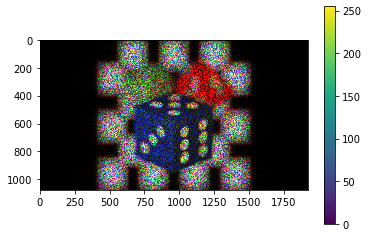

In [24]:
dice = plt.imread("C:\\Users\\ferna\\Desktop\\computerGeneratedHolography\\data\\dices1080p-AP\\dices1080p_ampli.bmp")
#print(type(dice))
print(dice.shape)

#plt.imshow(dice[:,:,1])
plt.imshow(dice)
plt.colorbar()
plt.show()

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'pitch', 'wlen', 'Hol', 'zobj'])
(1080, 1920)


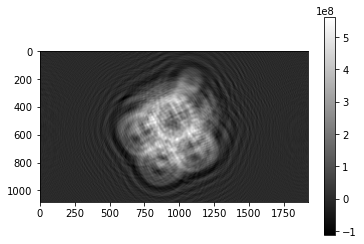

In [31]:
holDice = scipy.io.loadmat("C:\\Users\\ferna\\Desktop\\computerGeneratedHolography\\data\\2D_dice\\Hol_2D_dice.mat")
print(type(holDice))
print(holDice.keys())

holDiceHol = holDice['Hol']
#print(type(holDiceHol))
print(holDiceHol.shape)

plt.imshow(np.real(holDiceHol), cmap = 'gray')
plt.colorbar()
plt.show()

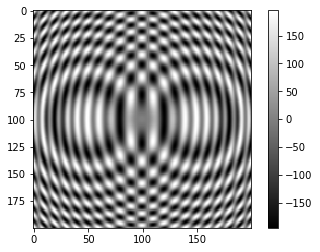

In [51]:
hol = np.loadtxt('hologram_image.mat')
#hol = scipy.io.loadmat('hologram_image.mat')

plt.imshow(hol, cmap='gray')
plt.colorbar()
plt.show()


## Wigner distribution

In [28]:
#from tftb.generators import fmlin
from tftb.processing import WignerVilleDistribution

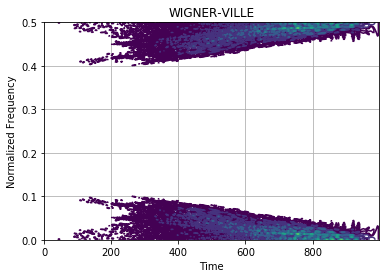

In [50]:
'''
n_points = 128
fmin, fmax = 0.0, 0.5
signal, _ = fmlin(n_points, fmin, fmax)
'''

h = np.real(holDice['Hol'])
hf = h.reshape(-1)
hf = hf[1:1000]

#print(hf.shape)
#print(type(hf[0]))

#g = signal
g = hf

wvd = WignerVilleDistribution(g)
wvd.run()
wvd.plot(kind='contour')

## NMF (Non-Negative Matrix Factorization)

### Example from scikit learn

In [53]:
X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

print(X)
X2 = np.matmul(W,H)
print(X2)
print(X - X2)

[[1.  1. ]
 [2.  1. ]
 [3.  1.2]
 [4.  1. ]
 [5.  0.8]
 [6.  1. ]]
[[1.00063558 0.99936347]
 [1.99965977 1.00034074]
 [2.99965485 1.20034566]
 [3.9998681  1.0001321 ]
 [5.00009002 0.79990984]
 [6.00008587 0.999914  ]]
[[-6.35579822e-04  6.36528773e-04]
 [ 3.40231372e-04 -3.40739354e-04]
 [ 3.45147253e-04 -3.45662574e-04]
 [ 1.31898319e-04 -1.32095249e-04]
 [-9.00218123e-05  9.01562192e-05]
 [-8.58722020e-05  8.60004133e-05]]


## ICA (Indepedent Component Analysis)

### Exemple from scikit learn

In [52]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA

X, _ = load_digits(return_X_y=True)
transformer = FastICA(n_components=7,
        random_state=0)
X_transformed = transformer.fit_transform(X)

print(X.shape)
print(X_transformed.shape)

(1797, 64)
(1797, 7)


c:\users\ferna\appdata\local\programs\python\python37\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
